### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

# Evaluation Metrics for Classification

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import numpy as np

#### Binary Problem

In [2]:
# ground-truth
y_true_bin  = ['Cancer'] * 100 + ['Healthy'] * 200

In [3]:
# fictional classifier 1: KNN
y_pred_bin_knn  = ['Cancer'] * 80 + ['Healthy'] * 20  # prediction of the true cancer
y_pred_bin_knn += ['Cancer'] * 130 + ['Healthy'] * 70  # prediction of the true healthy

In [4]:
# fictional classifier 2: Logistic Regression
y_pred_bin_logreg  = ['Cancer'] * 50 + ['Healthy'] * 50  # prediction of the true cancer
y_pred_bin_logreg += ['Cancer'] * 120 + ['Healthy'] * 80  # prediction of the true healthy

#### Multiclass Problem

In [5]:
y_true = ['Dog'] * 50 + ['Cat'] * 20  + ['Wolf'] * 20

In [6]:
y_pred =  ['Dog'] * 30 + ['Cat'] * 5 + ['Wolf'] * 15 # predictions for Dog
y_pred += ['Dog'] * 8 + ['Cat'] * 10 + ['Wolf'] * 2 # predictions for Cat
y_pred += ['Dog'] * 4 + ['Cat'] * 1 + ['Wolf'] * 15 # predictions for Cat

## 1. Confusion Matrix

In [7]:
y_true_bin_num = [2] * 100 + [1] * 200
y_pred_bin_num  = [2] * 80 + [1] * 20  # prediction of the true cancer
y_pred_bin_num += [2] * 130 + [1] * 70  # prediction of the true healthy

#### "Classifier 1": KNN

In [8]:
cm_knn = confusion_matrix(y_true_bin, y_pred_bin_knn, labels=['Healthy', 'Cancer'])
cm_knn

array([[ 70, 130],
       [ 20,  80]])

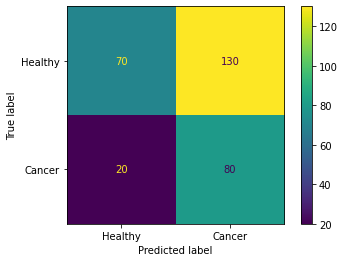

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Healthy', 'Cancer'])
disp.plot()

#### "Classifier 2": Logistic Regregression

In [10]:
cm_log_reg = confusion_matrix(y_true_bin, y_pred_bin_logreg, labels=['Healthy', 'Cancer'])
cm_log_reg

array([[ 80, 120],
       [ 50,  50]])

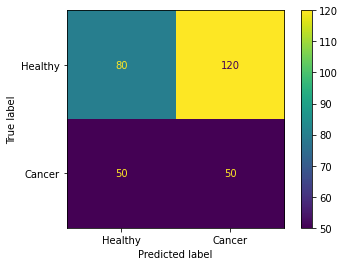

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Healthy', 'Cancer'])
disp.plot()

#### Multiclass

In [12]:
cm = confusion_matrix(y_true, y_pred, labels=['Cat', 'Dog', 'Wolf'])
cm

array([[10,  8,  2],
       [ 5, 30, 15],
       [ 1,  4, 15]])

In [13]:
confusion_matrix(y_true, y_pred, labels=['Cat', 'Dog', 'Wolf'])

array([[10,  8,  2],
       [ 5, 30, 15],
       [ 1,  4, 15]])

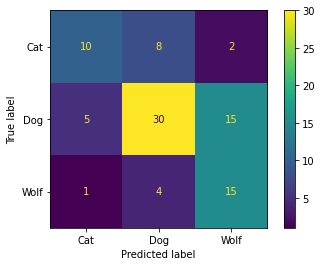

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog', 'Wolf'])
disp.plot()

In [15]:
cm = confusion_matrix(y_true, y_pred,
                      labels=['Cat', 'Dog', 'Wolf'])

TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

In [16]:
print(f'TP = {TP}')
print(f'FP = {FP}')
print(f'FN = {FN}')
print(f'TN = {TN}')

TP = [10 30 15]
FP = [ 6 12 17]
FN = [10 20  5]
TN = [64 28 53]


## 2. Sensitivity (`recall_score`)

#### "Classifier 1": KNN

In [17]:
recall_score(y_true_bin, y_pred_bin_knn, pos_label='Cancer')

0.8

#### "Classifier 2": Logistic Regregression

In [18]:
recall_score(y_true_bin, y_pred_bin_logreg, pos_label='Cancer')

0.5

#### Multiclass

In [19]:
# outputting a score for each class
recall_score(y_true, y_pred, average=None, labels=['Cat', 'Dog', 'Wolf'])

array([0.5 , 0.6 , 0.75])

In [20]:
# averaging the scores by the 'macro' strategy
recall_score(y_true, y_pred, average='macro', labels=['Cat', 'Dog', 'Wolf'])

0.6166666666666667

In [21]:
# averaging the scores by the 'micro' strategy
recall_score(y_true, y_pred, average='micro', labels=['Cat', 'Dog', 'Wolf'])

0.6111111111111112

In [22]:
# averaging the scores by the 'weighted' strategy
recall_score(y_true, y_pred, average='weighted', labels=['Cat', 'Dog', 'Wolf'])

0.6111111111111112

## 3. Specifity

For the **binary case**, _**specificity**_ is the **"sensitivity/recall"** for the **negative class**.

#### "Classifier 1": KNN

In [23]:
tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin_knn,
                                  labels=['Healthy', 'Cancer']).ravel()

specificity_knn = tn / (tn + fp)
print(f'specificity_knn = {specificity_knn}')

specificity_knn = 0.35


In [24]:
# for two classes, we can compute sensitivity by assuming the negative class as the positive class in `recall_score`.
recall_score(y_true_bin, y_pred_bin_knn, pos_label='Healthy')

0.35

#### "Classifier 2": Logistic Regregression

In [25]:
tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin_logreg,
                                  labels=['Healthy', 'Cancer']).ravel()

specificity_logreg = tn / (tn + fp)
print(f'specificity_logreg = {specificity_logreg}')

specificity_logreg = 0.4


In [26]:
# for two classes, we can compute sensitivity by assuming the negative class as the positive class in `recall_score`.
recall_score(y_true_bin, y_pred_bin_logreg, pos_label='Healthy')

0.4

#### Multiclass

In [27]:
cm = confusion_matrix(y_true, y_pred,
                      labels=['Cat', 'Dog', 'Wolf'])

# number of true samples of each class
class_sizes = cm.sum(axis=1)
number_of_samples = cm.sum()
weights = class_sizes / number_of_samples

TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

specifity = TN / (TN + FP)
specifity_macro = specifity.mean()
specifity_weighted = np.sum(specifity * weights)

print(f'specifity = {specifity}')
print(f'specifity macro = {specifity_macro}')
print(f'specifity weighted = {specifity_weighted}')

specifity = [0.91428571 0.7        0.75714286]
specifity macro = 0.7904761904761904
specifity weighted = 0.7603174603174603


## 4. Precision

#### "Classifier 1": KNN

In [28]:
precision_score(y_true_bin, y_pred_bin_knn, pos_label='Cancer')

0.38095238095238093

#### "Classifier 2": Logistic Regression

In [29]:
precision_score(y_true_bin, y_pred_bin_logreg, pos_label='Cancer')

0.29411764705882354

#### Multiclass

In [30]:
# outputting a score for each class
precision_score(y_true, y_pred, average=None, labels=['Cat', 'Dog', 'Wolf'])

array([0.625     , 0.71428571, 0.46875   ])

In [31]:
# averaging the scores by the 'macro' strategy
precision_score(y_true, y_pred, average='macro', labels=['Cat', 'Dog', 'Wolf'])

0.6026785714285715

In [32]:
# averaging the scores by the 'micro' strategy
precision_score(y_true, y_pred, average='micro', labels=['Cat', 'Dog', 'Wolf'])

0.6111111111111112

In [33]:
# averaging the scores by the 'weighted' strategy
precision_score(y_true, y_pred, average='weighted', labels=['Cat', 'Dog', 'Wolf'])

0.6398809523809524

## 5. Accuracy

#### "Classifier 1": KNN

In [34]:
accuracy_score(y_true_bin, y_pred_bin_knn)

0.5

#### "Classifier 2": KNN

In [35]:
accuracy_score(y_true_bin, y_pred_bin_logreg)

0.43333333333333335

#### Multiclass

In [36]:
# outputting a score for each class
accuracy_score(y_true, y_pred)

0.6111111111111112

## 6. Balanced Accuracy

#### "Classifier 1": KNN

In [37]:
print(classification_report(y_true_bin, y_pred_bin_knn, labels=['Healthy', 'Cancer'], digits=4))

              precision    recall  f1-score   support

     Healthy     0.7778    0.3500    0.4828       200
      Cancer     0.3810    0.8000    0.5161       100

    accuracy                         0.5000       300
   macro avg     0.5794    0.5750    0.4994       300
weighted avg     0.6455    0.5000    0.4939       300



In [38]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true_bin, y_pred_bin_knn, adjusted=False)

0.575

#### "Classifier 2": Logistic Regression

In [39]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true_bin, y_pred_bin_logreg, adjusted=False)

0.45

#### Multiclass

In [40]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true, y_pred, adjusted=False)

0.6166666666666667

## 7. Class Balanced Accuracy
A version proposed by [Mosley et al., “A balanced approach to the multi-class imbalance problem”, IJCV 2010.](https://lib.dr.iastate.edu/etd/13537/) <br/>
Section 3.2, Equations 3.1 – 3.4

In [41]:
def class_balanced_accuracy(y_true, y_pred):
    '''Class Balance Accuracy by Mosley et al.: “A balanced approach to the multi-class imbalance problem”, IJCV 2010.
https://lib.dr.iastate.edu/etd/13537 - Section 3.2, Equations 3.1 – 3.4
    
    Parameters:
    -----------
        y_true (1d array-like):
            Ground truth (correct) target values. 
        y_pred (1d array-like):
            Estimated targets as returned by a classifier.

    Returns:
    --------
        Class Balanced Accuracy.
    '''
    labels = list(set(y_true))
    assert len(labels) != 0

    recall = recall_score(y_true, y_pred, average=None, labels=labels)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)
    
    
    cba = np.minimum(recall, precision).mean()
    
    return cba

#### "Classifier 1": KNN

In [42]:
class_balanced_accuracy(y_true_bin, y_pred_bin_knn)

0.36547619047619045

#### "Classifier 2": Logistic Regression

In [43]:
class_balanced_accuracy(y_true_bin, y_pred_bin_logreg)

0.34705882352941175

#### Multiclass

In [44]:
class_balanced_accuracy(y_true, y_pred)

0.5229166666666667

## 8. F1-Score

#### "Classifier 1": KNN

In [45]:
from sklearn.metrics import f1_score
f1_score(y_true_bin, y_pred_bin_knn, pos_label='Cancer')

0.5161290322580645

#### "Classifier 2": Logistic Regression

In [46]:
f1_score(y_true_bin, y_pred_bin_logreg, pos_label='Cancer')

0.37037037037037035

#### Multiclass

In [47]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average=None, labels=['Cat', 'Dog', 'Wolf'])

array([0.55555556, 0.65217391, 0.57692308])

In [48]:
# outputting a score for each class
f1_score(y_true, y_pred, average=None, labels=['Cat', 'Dog', 'Wolf'])

array([0.55555556, 0.65217391, 0.57692308])

In [49]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro',
         labels=['Cat', 'Dog', 'Wolf'])

0.5948841818407036

In [50]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='micro',
         labels=['Cat', 'Dog', 'Wolf'])

0.6111111111111112

In [51]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='weighted',
         labels=['Cat', 'Dog', 'Wolf'])

0.6139807589082951

## 9. Classification Report

#### "Classifier 1": KNN

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true_bin, y_pred_bin_knn, labels=['Healthy', 'Cancer'], digits=4))

              precision    recall  f1-score   support

     Healthy     0.7778    0.3500    0.4828       200
      Cancer     0.3810    0.8000    0.5161       100

    accuracy                         0.5000       300
   macro avg     0.5794    0.5750    0.4994       300
weighted avg     0.6455    0.5000    0.4939       300



#### "Classifier 2": Logistic Regression

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_true_bin, y_pred_bin_logreg, labels=['Healthy', 'Cancer'], digits=4))

              precision    recall  f1-score   support

     Healthy     0.6154    0.4000    0.4848       200
      Cancer     0.2941    0.5000    0.3704       100

    accuracy                         0.4333       300
   macro avg     0.4548    0.4500    0.4276       300
weighted avg     0.5083    0.4333    0.4467       300



#### Multiclass

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, labels=['Cat', 'Dog', 'Wolf'], digits=4))

              precision    recall  f1-score   support

         Cat     0.6250    0.5000    0.5556        20
         Dog     0.7143    0.6000    0.6522        50
        Wolf     0.4688    0.7500    0.5769        20

    accuracy                         0.6111        90
   macro avg     0.6027    0.6167    0.5949        90
weighted avg     0.6399    0.6111    0.6140        90

